In [31]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install --upgrade keras

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [44]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11)  
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

import tensorflow as tf
from tensorflow.keras.utils import to_categorical  
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from scikeras.wrappers import KerasClassifier  


In [45]:
# Defining the directory paths
folder_benign_train = '/Users/raphael/Documents/GitHub/skin-cancer-group-2/data/train/benign'
folder_malignant_train = '/Users/raphael/Documents/GitHub/skin-cancer-group-2/data/train/malignant'

folder_benign_test = '/Users/raphael/Documents/GitHub/skin-cancer-group-2/data/test/benign'
folder_malignant_test = '/Users/raphael/Documents/GitHub/skin-cancer-group-2/data/test/malignant'

# I took a moment convert to relative paths to absolute paths to be extra cautious
absolute_folder_benign_train = os.path.abspath(folder_benign_train)
absolute_folder_malignant_train = os.path.abspath(folder_malignant_train)
absolute_folder_benign_test = os.path.abspath(folder_benign_test)
absolute_folder_malignant_test = os.path.abspath(folder_malignant_test)

# Creating a function to read and convert images
def read_image(imname):
    img = Image.open(imname).convert("RGB")
    return np.asarray(img)

# Loading in the benign training images
ims_benign = [read_image(os.path.join(absolute_folder_benign_train, filename)) for filename in os.listdir(absolute_folder_benign_train) if filename.endswith(('.png', '.jpg', '.jpeg'))]
X_benign = np.array(ims_benign, dtype='uint8')

# Loading the malignant training images
ims_malignant = [read_image(os.path.join(absolute_folder_malignant_train, filename)) for filename in os.listdir(absolute_folder_malignant_train) if filename.endswith(('.png', '.jpg', '.jpeg'))]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Loading in the benign testing images
ims_benign_test = [read_image(os.path.join(absolute_folder_benign_test, filename)) for filename in os.listdir(absolute_folder_benign_test) if filename.endswith(('.png', '.jpg', '.jpeg'))]
X_benign_test = np.array(ims_benign_test, dtype='uint8')

# Loading in the malignant testing images
ims_malignant_test = [read_image(os.path.join(absolute_folder_malignant_test, filename)) for filename in os.listdir(absolute_folder_malignant_test) if filename.endswith(('.png', '.jpg', '.jpeg'))]
X_malignant_test = np.array(ims_malignant_test, dtype='uint8')

# Creating the labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

# Merging the data
X_train = np.concatenate((X_benign, X_malignant), axis=0)
y_train = np.concatenate((y_benign, y_malignant), axis=0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis=0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis=0)

# Shuffling the data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

# Normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Buidling the model on this step 
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# This step here is the model compilation
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

# training and fitting the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluating the model's validation loss and accuracy score
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')

# Don't forget to save your model 
model.save('/Users/raphael/Documents/GitHub/skin-cancer-group-2/skin_cancer_classifier.h5')

Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 62s 727ms/step - accuracy: 0.5513 - loss: 0.6806 - val_accuracy: 0.5833 - val_loss: 0.6185
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 66s 801ms/step - accuracy: 0.7024 - loss: 0.5731 - val_accuracy: 0.6182 - val_loss: 0.6817
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.7422 - loss: 0.5015 - val_accuracy: 0.7182 - val_loss: 0.4678
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.7626 - loss: 0.4796 - val_accuracy: 0.8045 - val_loss: 0.4305
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 60s 717ms/step - accuracy: 0.7754 - loss: 0.4467 - val_accuracy: 0.8045 - val_loss: 0.4197
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 60s 719ms/step - accuracy: 0.7838 - loss: 0.4307 - val_accuracy: 0.8303 - val_loss: 0.4176
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 62s 752ms/step - accuracy: 0.8030 - loss: 0.4055 - val_accuracy: 0.8242 - val_loss: 0.3967
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 63s 762ms/step - accuracy: 0.7931 - loss: 0.4164 - val_accuracy

Validation Loss: 0.3718733489513397
Validation Accuracy: 0.8227272629737854


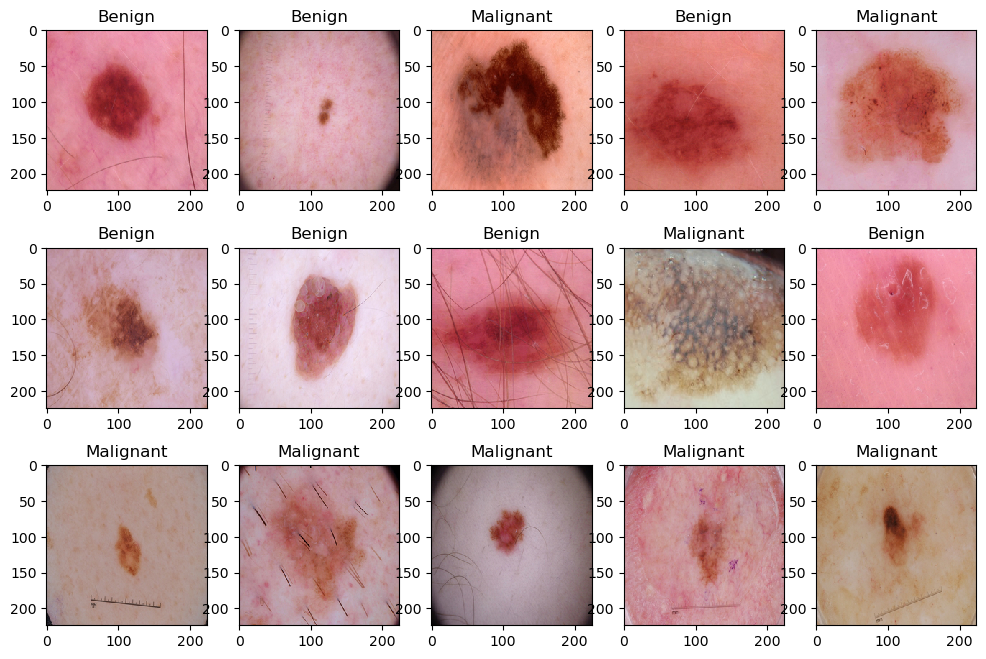

In [46]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [51]:
# Now to make predictions
def predict_image(image_path):
    img = Image.open(image_path).resize((224, 224))
    img_array = np.asarray(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    print(f'Prediction: {"Malignant" if prediction[0][0] > 0.5 else "Benign"}')

# Take this bit of code below to test the model
predict_image('/Users/raphael/Documents/GitHub/skin-cancer-group-2/data/test/malignant/1447.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction: Malignant
